In [1]:
import pandas as pd
import pickle
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

rnd_state = 42

In [2]:
with open("/home/luca/Desktop/dataset/dataset1.pickle", "rb") as f:
    df = pickle.load(f)

In [3]:
df.head()

,generic_fileSize,generic_fileEntropy,header_SizeOfHeaders,header_AddressOfEntryPoint,header_ImageBase,header_SizeOfImage,header_SizeOfCode,header_SizeOfInitializedData,header_SizeOfUninitializedData,header_BaseOfCode,...,pesection_12_exists,pesection_12_isStandard,pesection_13_exists,pesection_13_isStandard,pesection_14_exists,pesection_14_isStandard,pesection_15_exists,pesection_15_isStandard,pesection_16_exists,pesection_16_isStandard
sample_hash,,,,,,,,,,,,,,,,,,,,,
cfa2d5eeac7de9f134cb2e36d54a5c4053f62fdf9d5302994557da1287719414,1666137,7.996651,1024,5358807,4194304,5365760,310272,56832,0,4096,...,True,False,False,False,False,False,False,False,False,False
00ebebc75f61527282cee19ab7aed80693b63fbb969e7154d17838f9dd08db2f,10543104,4.821304,4096,4512,4194304,118784,94208,20480,0,4096,...,False,False,False,False,False,False,False,False,False,False
f45e6ca3a2bbbaa1c514d81abe9daaa47f7d41da500e6933f61adf29f5f39835,57368,4.979988,4096,9759,4194304,57344,8192,45056,0,4096,...,False,False,False,False,False,False,False,False,False,False
d694a203bb211751669f8742db877e8ebd5eff5b126abc4c3e59cdb81f9dbb56,7922688,7.950081,1024,155508,4194304,7950336,570880,7350784,0,4096,...,False,False,False,False,False,False,False,False,False,False
15c9feb810c48ffef1c7e32cbe58a11037da94e958fb1f34e8feca1643dd80eb,159744,5.911521,4096,86524,4194304,159744,86016,69632,0,4096,...,False,False,False,False,False,False,False,False,False,False


In [4]:
#df = df.drop("pesectionProcessed_entrypointSection_name", axis=1)

# Check if any column is of type bool
is_bool_column = df.dtypes == 'bool'
bool_cols = df.columns[is_bool_column]

for bool_col in bool_cols:
    df[bool_col] = df[bool_col].astype(int)

In [5]:
df = df.drop("pesectionProcessed_entrypointSection_name", axis=1)

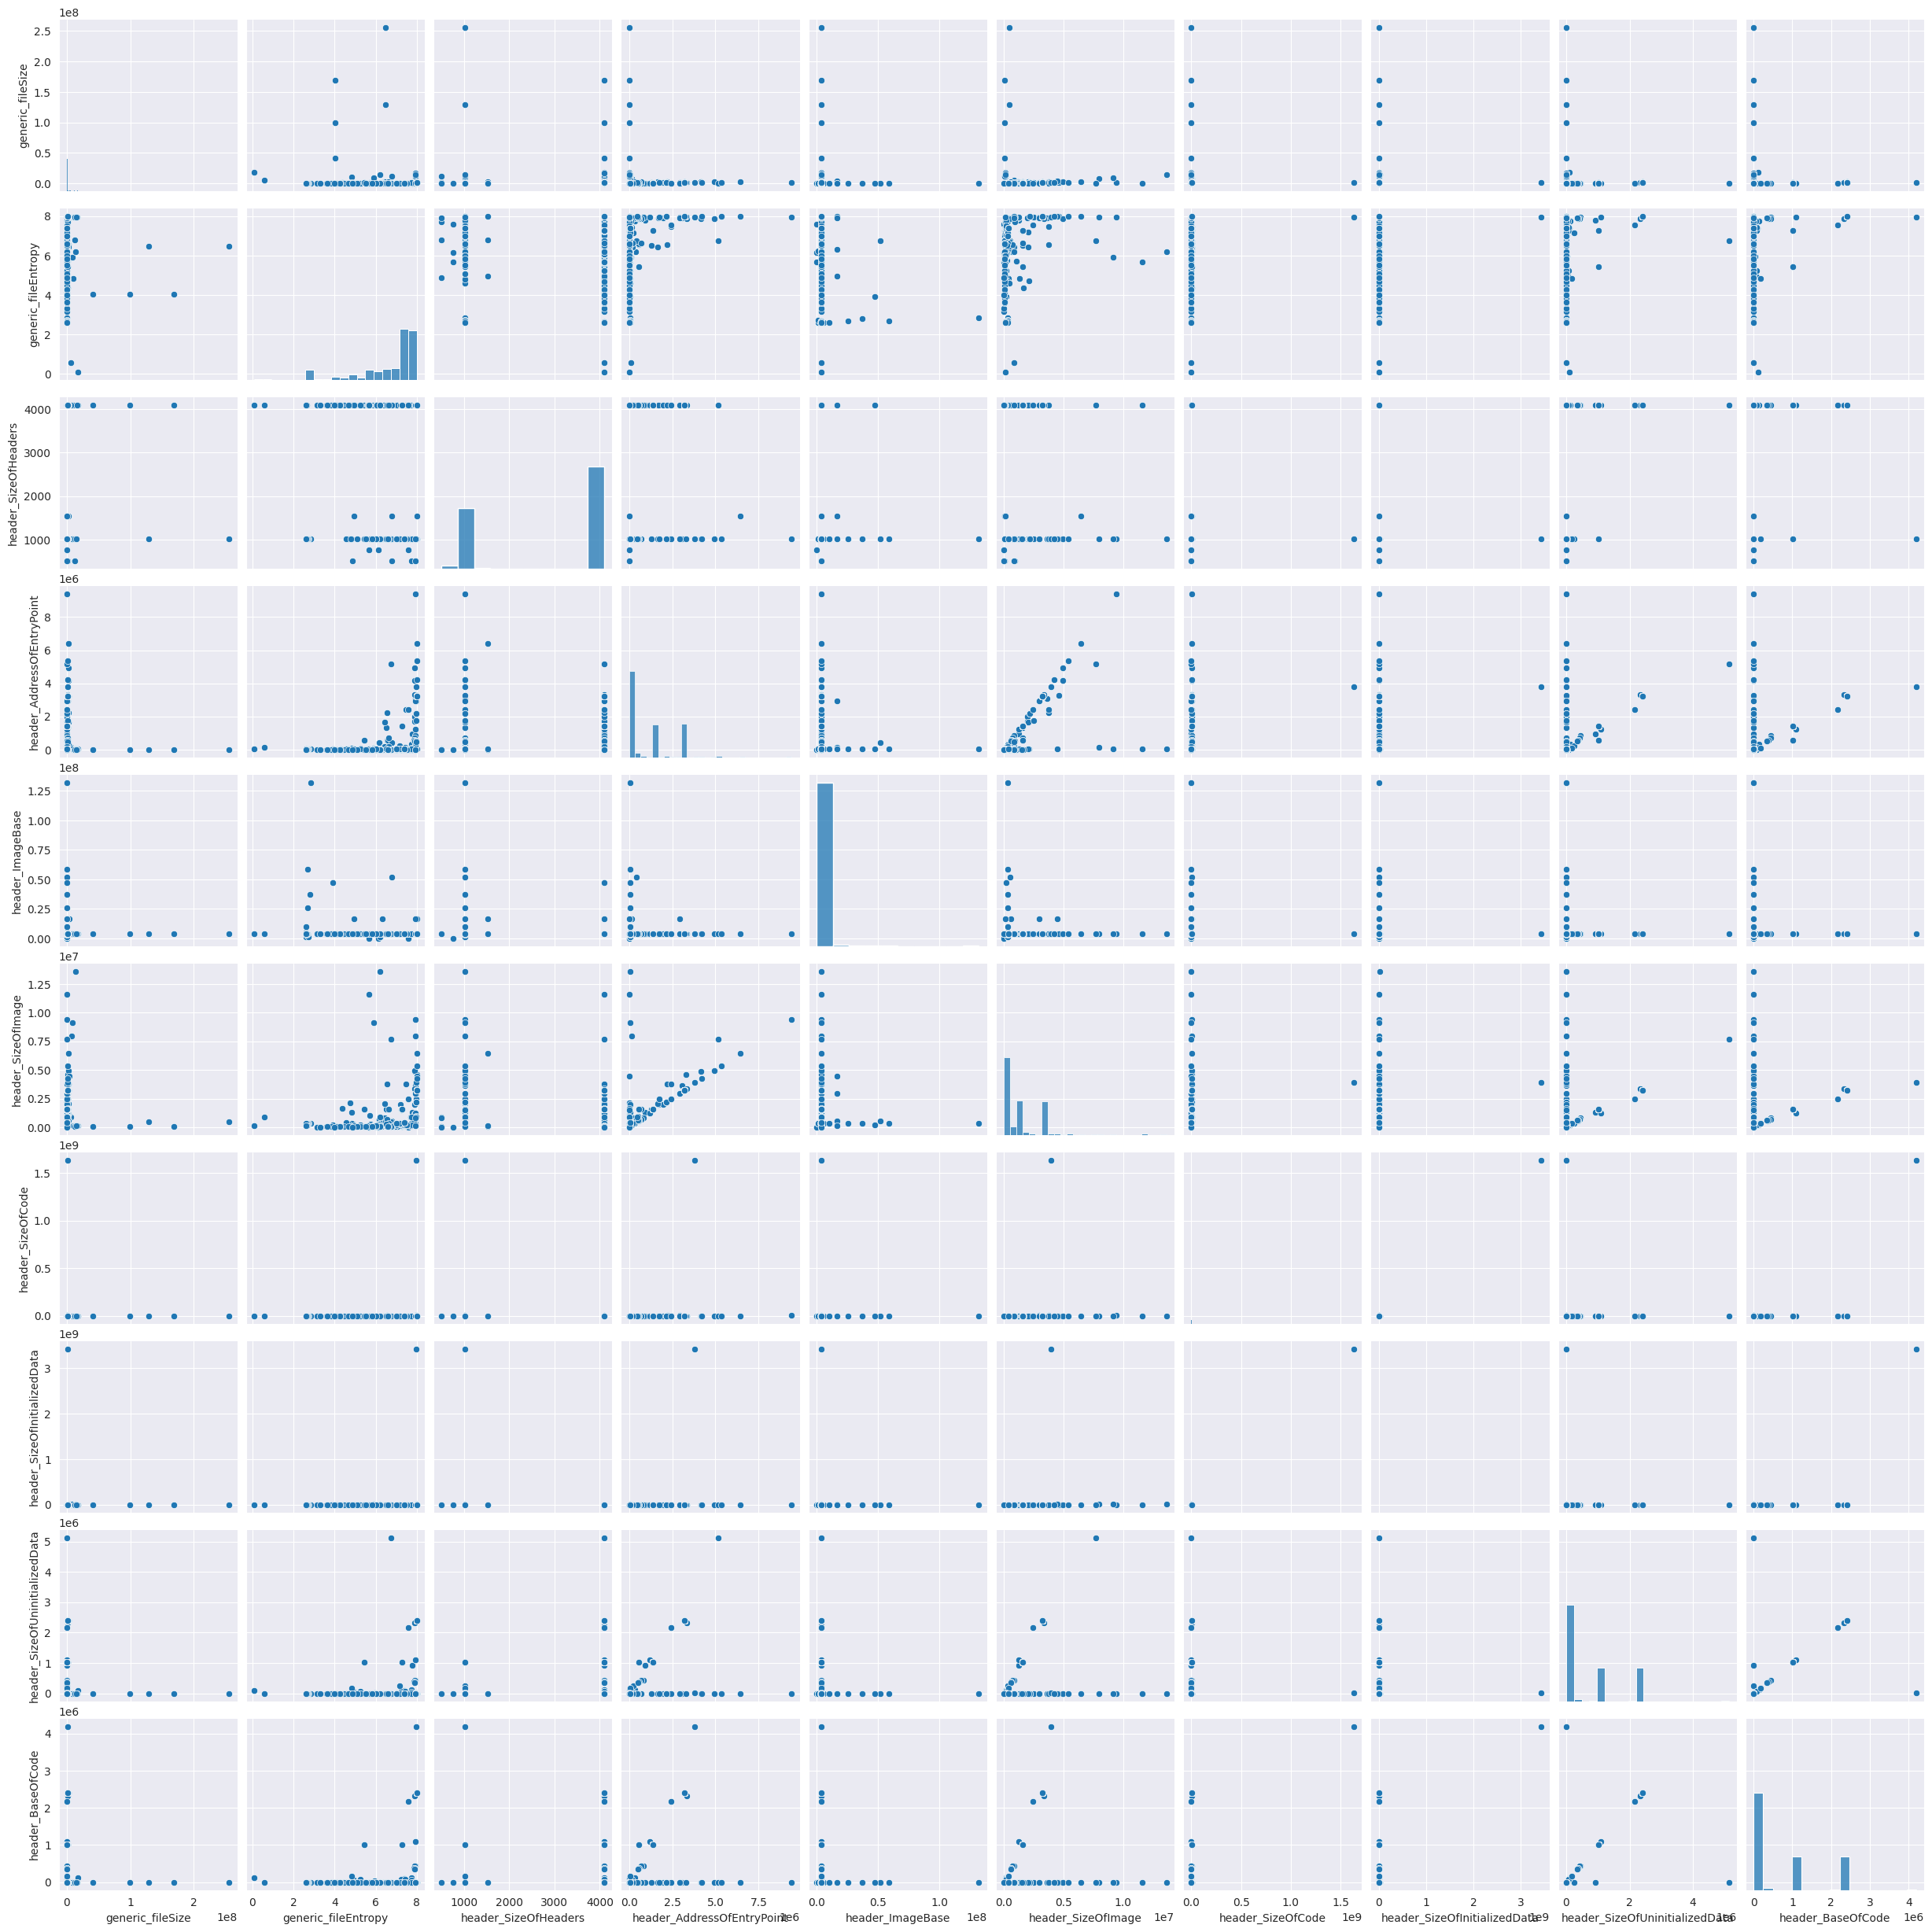

In [6]:
X = df.iloc[:, :10]
sns.pairplot(pd.DataFrame(X))

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
X = df

In [26]:
X = X.to_numpy()

In [10]:
from scipy.cluster.hierarchy import dendrogram

In [11]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [30]:
from sklearn import random_projection
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.shape

(500, 5326)

In [31]:
param_grid = {'linkage': ['ward', 'complete', 'average', 'single']}
#sil_thr = 0  # visualize results only for combinations with silhouette above the threshold
#unc_thr = 10 # visualize results only for combinations with unclustered% below the threshold
params = list(ParameterGrid(param_grid))

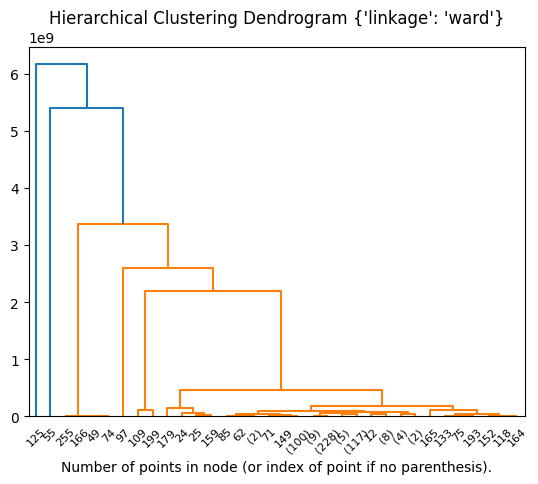

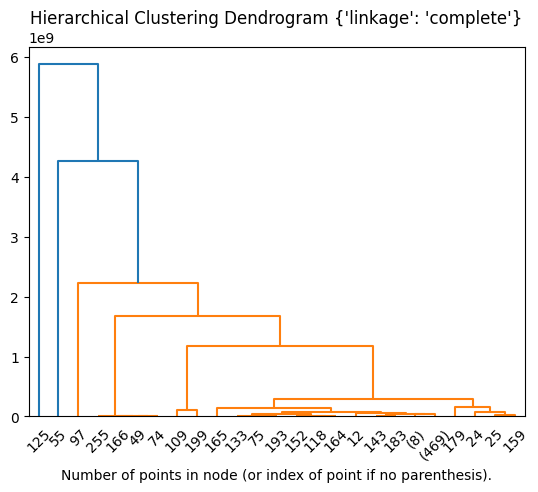

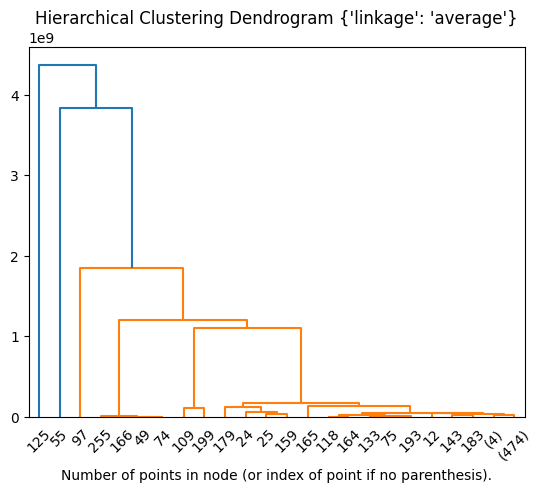

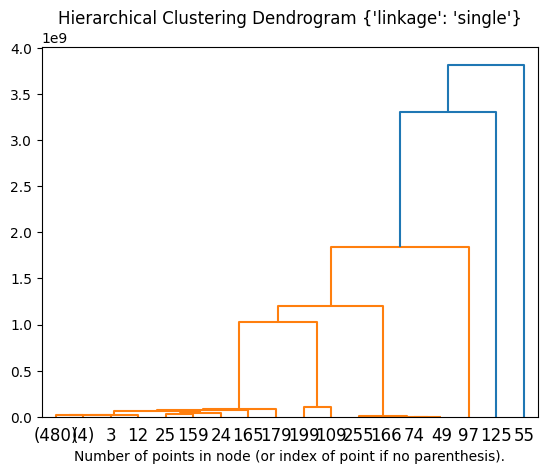

In [80]:
# setting distance_threshold=0 ensures we compute the full tree.
for i in range(len(params)):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, **(params[i]))
    model = model.fit(X_new)
    plt.title(f"Hierarchical Clustering Dendrogram {params[i]}")
    # plot the top ten levels of the dendrogram
    plot_dendrogram(model, truncate_mode="level", p=10)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

In [73]:
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise_distances
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm
import numpy as np

silhouette_scores = []
wcss = []
for n_clusters in range(2, 500):
    
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clusterer.fit_predict(X_new)

    # Calculate centroids of each cluster
    centroids = []
    for label in np.unique(labels):
        centroid = np.mean(X_new[labels == label], axis=0)
        centroids.append(centroid)
    
    # Calculate within-cluster sum of squared errors (SSE)
    sse = 0
    for label, centroid in zip(np.unique(labels), centroids):
        sse += np.sum((X_new[labels == label] - centroid) ** 2)

    wcss.append(sse)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_new, labels)
    # print("For n_clusters =", n_clusters,
    #       "The average silhouette_score is :", silhouette_avg)
    silhouette_scores.append(silhouette_avg)

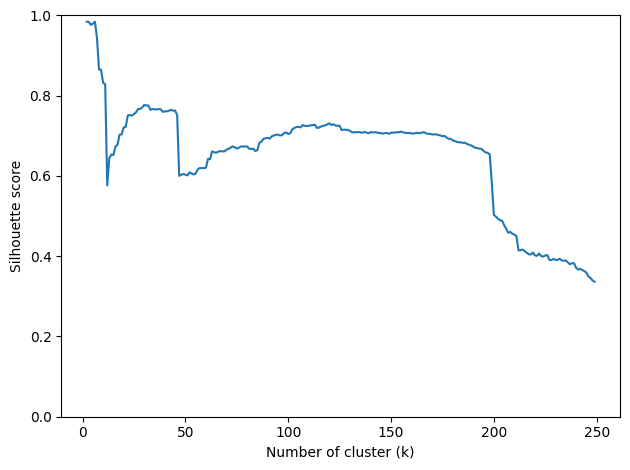

In [74]:
fig, ax = plt.subplots()

k_range = list(range(2, 250))
silhouette_scores_1 = silhouette_scores[:250-2]

ax.set_xlabel('Number of cluster (k)')
ax.set_ylabel('Silhouette score')  # we already handled the x-label with ax1
ax.plot(k_range, silhouette_scores_1)
ax.tick_params(axis='y')
ax.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


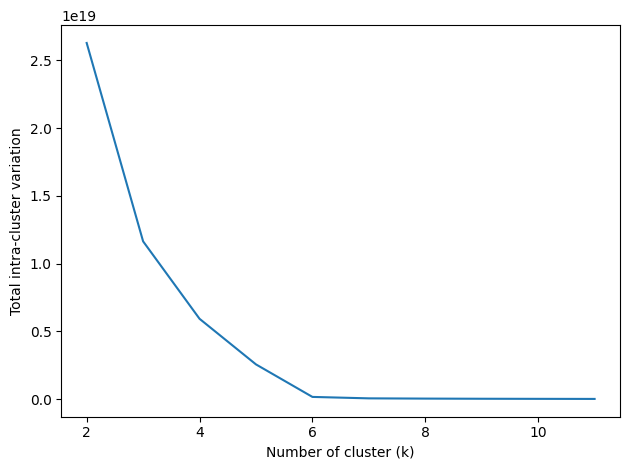

In [78]:
fig, ax = plt.subplots()

k_range = list(range(2, 12))
wcss_1 = wcss[:10]

ax.set_xlabel('Number of cluster (k)')
ax.set_ylabel('Total intra-cluster variation')  # we already handled the x-label with ax1
ax.plot(k_range, wcss_1)
ax.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()